# Logistic Regression Modeling

### 1. Import Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

___

### 2. Expand maximum range of rows

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

___

### 3. Load Data

In [11]:
df = pd.read_csv('../Data/Recipes_raw.csv', index_col=0)

In [14]:
df.head()

,aggregateLikes,analyzedInstructions,cookingMinutes,dairyFree,diets,dishTypes,extendedIngredients,glutenFree,healthScore,ketogenic,lowFodmap,num_ingredients,preparationMinutes,pricePerServing,readyInMinutes,servings,spoonacularSourceUrl,sustainable,title,vegan,vegetarian,veryHealthy,veryPopular,weightWatcherSmartPoints,whole30,Calories,Fat,Saturated_Fat,Carbohydrates,Sugar,Cholesterol,Sodium,Protein,Vitamin_K,Vitamin_A,Vitamin_C,Manganese,Folate,Fiber,Copper,Magnesium,Phosphorus,Vitamin_B6,Potassium,Vitamin_B1,Iron,Vitamin_B2,Vitamin_E,Zinc,Vitamin_B5,Vitamin_B3,Calcium,Selenium,num_words_instructions,num_steps_instructions,ingredients_list,ingredient_types,primal,paleo
0,50078,"[{'name': '', 'steps': [{'number': 1, 'step': ...",25.0,True,"['gluten free', 'dairy free', 'lacto ovo veget...",['side dish'],"[{'id': 1022009, 'aisle': 'Ethnic Foods;Spices...",True,100.0,False,False,15,25.0,101.23,50,6,https://spoonacular.com/kale-and-quinoa-salad-...,False,Kale and Quinoa Salad with Black Beans,True,True,True,True,6.0,False,242.60,7.38,1.03,37.19,1.80,0.0,250.66,9.79,142.68,4183.66,48.48,1.01,160.25,8.84,0.63,111.48,239.17,0.38,667.61,0.28,2.98,0.21,1.82,1.80,0.91,1.72,69.53,3.59,186,10,"['ancho chile powder', 'avocado', 'black beans...","Counter({'Produce': 7, 'Spices and Seasonings'...",0,0
1,67131,"[{'name': '', 'steps': [{'number': 1, 'step': ...",10.0,True,"['dairy free', 'lacto ovo vegetarian', 'vegan']","['lunch', 'main course', 'main dish', 'dinner']","[{'id': 9037, 'aisle': 'Produce', 'image': 'av...",False,100.0,False,False,7,5.0,171.39,15,2,https://spoonacular.com/creamy-avocado-pasta-5...,False,Creamy Avocado Pasta,True,True,True,True,13.0,False,484.43,16.17,2.38,78.08,3.95,0.0,599.51,15.36,31.03,2618.17,108.44,2.86,166.19,8.42,0.60,161.21,295.36,0.69,852.80,0.53,4.03,0.32,3.33,2.88,2.50,6.88,56.76,62.80,108,6,"['avocado', 'bell pepper', 'fresh cilantro', '...","Counter({'Produce': 4, 'Produce;Spices and Sea...",0,0
2,142071,"[{'name': '', 'steps': [{'number': 1, 'step': ...",5.0,True,"['dairy free', 'lacto ovo vegetarian']",['side dish'],"[{'id': 9037, 'aisle': 'Produce', 'image': 'av...",False,95.0,False,False,7,5.0,160.46,10,1,https://spoonacular.com/avocado-toast-with-egg...,False,"Avocado Toast with Eggs, Spinach, and Tomatoes",False,True,True,True,7.0,False,277.24,15.90,2.36,22.41,2.90,0.0,446.21,13.71,168.17,2960.71,18.56,1.02,156.59,9.33,0.35,83.28,134.02,0.38,835.23,0.19,2.11,0.54,2.84,1.33,1.74,3.36,76.83,25.20,97,6,"['avocado', 'campari', 'egg whites', 'multigra...","Counter({'Produce': 3, 'Alcoholic Beverages': ...",0,0
3,7119,"[{'name': '', 'steps': [{'number': 1, 'step': ...",5.0,True,"['gluten free', 'dairy free', 'lacto ovo veget...",['side dish'],"[{'id': 11215, 'aisle': 'Produce', 'image': 'g...",True,100.0,False,False,7,10.0,51.22,15,4,https://spoonacular.com/citrus-sesame-kale-495111,False,Citrus Sesame Kale,True,True,True,True,1.0,False,72.07,3.56,0.47,8.58,0.41,0.0,158.35,4.14,599.75,8505.00,104.44,0.61,29.09,0.00,1.32,45.25,89.50,0.25,440.62,0.11,1.47,0.12,0.00,0.58,0.00,1.01,139.68,1.24,62,4,"['garlic', 'ginger', 'kale', 'orange juice', '...","Counter({'Produce': 2, 'Produce;Ethnic Foods;S...",0,0
4,231494,"[{'name': '', 'steps': [{'number': 1, 'step': ...",0.0,False,"['gluten free', 'primal']",['salad'],"[{'id': 9085, 'aisle': 'Dried Fruits;Produce',...",True,96.0,False,False,8,10.0,279.17,10,2,https://spoonacular.com/melt-in-your-mouth-kal...,False,Melt In Your Mouth Kale Salad,False,False,True,True,11.0,False,441.93,33.36,4.33,32.12,20.69,6.8,381.72,12.02,481.49,6599.81,85.22,3.52,37.80,2.93,1.54,130.48,354.60,0.30,761.30,0.24,3.75,0.23,4.22,2.99,0.24,2.56,243.24,3.28,59,4,"['currants', 'honey', 'juice of lemon', 'kale'...","Counter({'Produce': 2, 'Dried Fruits;Produce':...",1,0


___

### 4. Scale DataFrame For Regression

In [4]:
cols_to_scale = ['cookingMinutes', 'num_ingredients','preparationMinutes', 
                 'pricePerServing', 'readyInMinutes', 'servings','weightWatcherSmartPoints',
                'Calories', 'Fat', 'Saturated_Fat', 'Carbohydrates', 'Sugar','Cholesterol', 
                 'Sodium', 'Protein', 'Vitamin_K', 'Vitamin_A','Vitamin_C', 'Manganese', 
                 'Folate', 'Fiber', 'Copper', 'Magnesium','Phosphorus', 'Vitamin_B6', 
                 'Potassium', 'Vitamin_B1', 'Iron','Vitamin_B2', 'Vitamin_E', 'Zinc', 
                 'Vitamin_B5', 'Vitamin_B3','Calcium', 'Selenium', 'num_words_instructions',
                 'num_steps_instructions']

In [5]:
df.drop(columns = ['analyzedInstructions', 'diets', 'extendedIngredients',
                  'dairyFree','dishTypes','glutenFree','healthScore', 'ketogenic', 
                   'lowFodmap','sustainable', 'veryHealthy', 'veryPopular',], inplace = True)

In [6]:
ss = StandardScaler()

In [7]:
df_ss = pd.DataFrame(ss.fit_transform(df[cols_to_scale].values), columns=cols_to_scale)

In [8]:
df_ss['aggregateLikes'] = df['aggregateLikes']
categorical_list = 'ingredients_list', 'ingredient_types', 'title', 'spoonacularSourceUrl'
for category in categorical_list:
    df_ss[category] = df[category]
    

In [9]:
# df_ss.to_csv('../Data/scaled_raw.csv')

In [10]:
df_ss.head(1)

,cookingMinutes,num_ingredients,preparationMinutes,pricePerServing,readyInMinutes,servings,weightWatcherSmartPoints,Calories,Fat,Saturated_Fat,Carbohydrates,Sugar,Cholesterol,Sodium,Protein,Vitamin_K,Vitamin_A,Vitamin_C,Manganese,Folate,Fiber,Copper,Magnesium,Phosphorus,Vitamin_B6,Potassium,Vitamin_B1,Iron,Vitamin_B2,Vitamin_E,Zinc,Vitamin_B5,Vitamin_B3,Calcium,Selenium,num_words_instructions,num_steps_instructions,aggregateLikes,ingredients_list,ingredient_types,title,spoonacularSourceUrl
0,-0.029409,1.485089,0.885421,-0.821052,0.268322,0.824448,-0.304844,-0.539093,-0.560448,-0.508531,-0.127736,-0.951911,-0.406466,-0.408416,-0.533227,-0.33183,-0.328877,-0.50621,-0.320724,-0.015287,-0.050056,-0.182813,0.051568,-0.264517,-0.644863,-0.724778,-0.300279,-0.21411,-0.520542,-0.436259,-0.202744,-0.394235,-0.517132,-0.779387,-0.583611,0.949967,0.805282,50078,"['ancho chile powder', 'avocado', 'black beans...","Counter({'Produce': 7, 'Spices and Seasonings'...",Kale and Quinoa Salad with Black Beans,https://spoonacular.com/kale-and-quinoa-salad-...


In [11]:
df['aggregateLikes'].describe()

count    1.000000e+03
mean     1.326577e+04
std      6.138746e+04
min      3.600000e+01
25%      5.220000e+02
50%      1.306000e+03
75%      4.163250e+03
max      1.053360e+06
Name: aggregateLikes, dtype: float64

<b>Notes:</b>
- Mean number of likes is about 13,000 - probably heavily skewed by outliers with very high "like" count.
- Median number of likes is about 1,300 - probably more reliable as a "cutoff" for our classifier.
- 75th Percentile of likes is about 4,000 - this shows that the mean is much higher than the 75th percentile, so it is definitely very skewed.

In [12]:
df_ss['high_likes'] = df.apply(lambda _: 0, axis=1)
for index, value in enumerate(df_ss.aggregateLikes):
    if value > df_ss.aggregateLikes.median():
        df_ss['high_likes'][index] = 1
df_ss['high_likes'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1    958
0     42
Name: high_likes, dtype: int64

___

### 5. Train / Test Split Data

In [13]:
x_variables_1 = ['num_ingredients', 
              'pricePerServing', 
              'readyInMinutes', 
              'servings', 
              'weightWatcherSmartPoints', 
              'Calories', 
              'Fat', 
              'Saturated_Fat', 
              'Carbohydrates', 
              'Sugar', 
              'Cholesterol', 
              'Sodium', 
              'Protein', 
              'Vitamin_K', 
              'Vitamin_A', 
              'Vitamin_C', 
              'Manganese', 
              'Folate', 
              'Fiber', 
              'Copper', 
              'Magnesium', 
              'Phosphorus', 
              'Vitamin_B6', 
              'Potassium', 
              'Vitamin_B1', 
              'Iron', 
              'Vitamin_B2', 
              'Vitamin_E', 
              'Zinc', 
              'Vitamin_B5', 
              'Vitamin_B3', 
              'Calcium', 
              'Selenium', 
              'num_words_instructions', 
              'num_steps_instructions']

In [14]:
predictors = df_ss[x_variables_1]
target = df_ss['high_likes']
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state = 2020, test_size = .25, stratify=target) 

___

### 6. Run Logistic Regression

We will use sklearn "liblinear" solver since our dataset is not very large (1000 observations). The "liblinear" solver is recommended in the sklearn.linear_model.LogisticRegression documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Try C-value of really large number for smaller regularization.

Try C-value of really small number for greater regularization.

In [15]:
logreg = LogisticRegression(C=1e+16, fit_intercept=True, max_iter=50000, penalty='l2', random_state=2020, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 0.8369599353941405
Test AUC: 0.5728413845568657


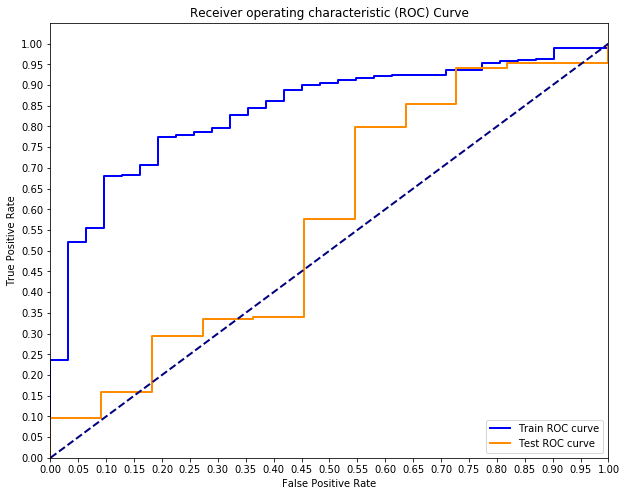

In [16]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<b>Notes</b>

- Train ROC Curve and Test ROC Curve are both performing better than just a 50/50 chance coin toss (the diagonal line.) Yay!
- 

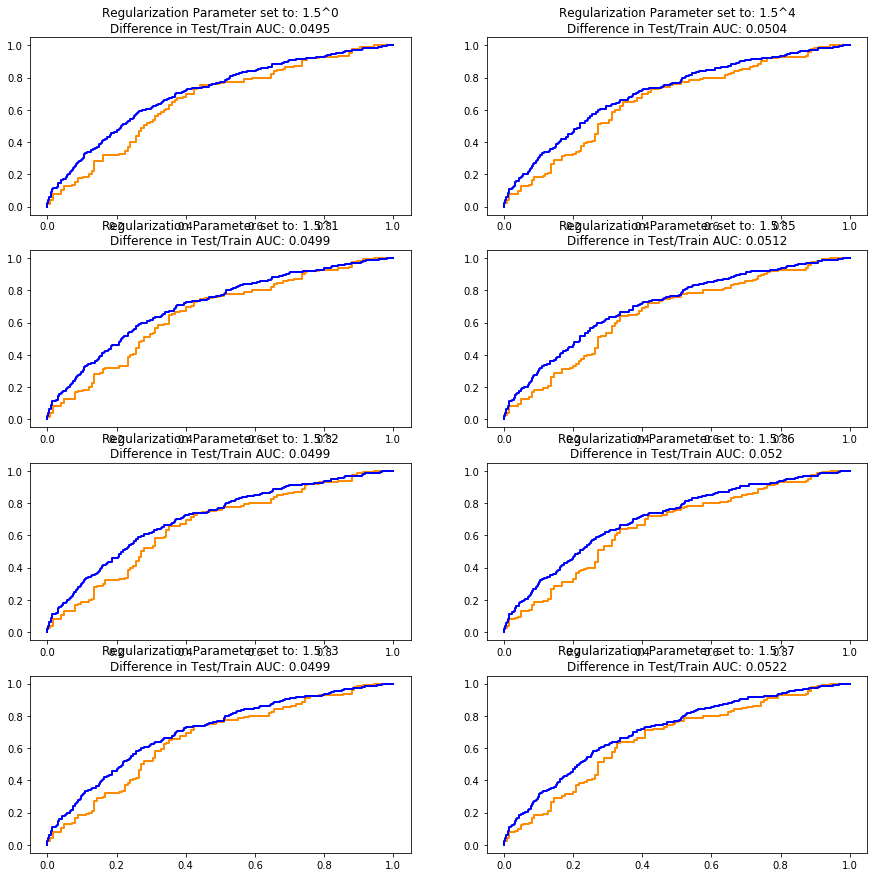

In [17]:
fig, axes = plt.subplots(4,2, figsize=(15, 15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i, j]
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)

#     print('Test AUC with C=1.5^{}: {}'.format(n*2, auc(test_fpr, test_tpr)))
#     print('Train AUCwith C=1.5^{}: {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))